## Statistical Data

In [1]:
!python --version

Python 3.6.4 :: Anaconda custom (64-bit)


In [1]:
!pip install -U matplotlib

     |████████████████████████████████| 14.4MB 984kB/s eta 0:00:01
     |████████████████████████████████| 122kB 27.8MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from scipy import stats

In [3]:
matplotlib.__version__

'2.1.2'

Dataset source: <br>
https://www.kaggle.com/zaephaer/vegetable-oil-monthly-price<br>
Monthly and Yearly data of multiple vegetable oil price. Data collected from MPOB website. From 2006 to 2018.

In [4]:
oil_data = pd.read_csv('datasets/MPOB_data1.csv')

oil_data.head()

,Year,Month,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
0,2006,Jan,424.0,532.0,930.0,591.0,733.0,569.0,750.0,445.0,407.0
1,2006,Feb,445.0,535.0,921.0,595.0,723.0,591.0,761.0,430.0,405.0
2,2006,Mar,440.0,539.0,902.0,606.0,742.0,575.0,807.0,410.0,431.0
3,2006,Apr,439.0,540.0,899.0,659.0,796.0,578.0,840.0,394.0,437.0
4,2006,May,440.0,588.0,892.0,679.0,838.0,583.0,841.0,408.0,447.0


In [5]:
oil_data.describe()

,Year,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
count,156.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2012.000000,792.725490,947.856209,1414.601307,988.843137,992.202614,1149.137255,1482.954248,853.215686,792.594771
std,3.753708,205.275336,229.628287,515.906259,314.525292,227.338443,364.608443,456.779751,220.306095,209.217321
min,2006.000000,424.000000,532.000000,0.000000,0.000000,709.000000,569.000000,620.000000,394.000000,405.000000
25%,2009.000000,663.000000,790.000000,1214.000000,802.000000,817.000000,861.000000,1015.000000,737.000000,638.000000
50%,2012.000000,771.000000,883.000000,1356.000000,887.000000,896.000000,1131.000000,1580.000000,838.000000,762.000000
75%,2015.000000,906.000000,1140.000000,1673.000000,1221.000000,1190.000000,1439.000000,1800.000000,1025.000000,930.000000
max,2018.000000,1292.000000,1537.000000,2555.000000,2045.000000,1577.000000,2256.000000,2400.000000,1363.000000,1392.000000


In [6]:
oil_data.mean().sort_values(ascending=False)[1:]

FishOil          1482.954248
GroundnutOil     1414.601307
CoconutOil       1149.137255
RapeseedOil       992.202614
SunflowerOil      988.843137
SoyabeanOil       947.856209
Tallow            853.215686
CrudePalmOil      792.725490
Lard              792.594771
dtype: float64

Text(0,0.5,'Prices')

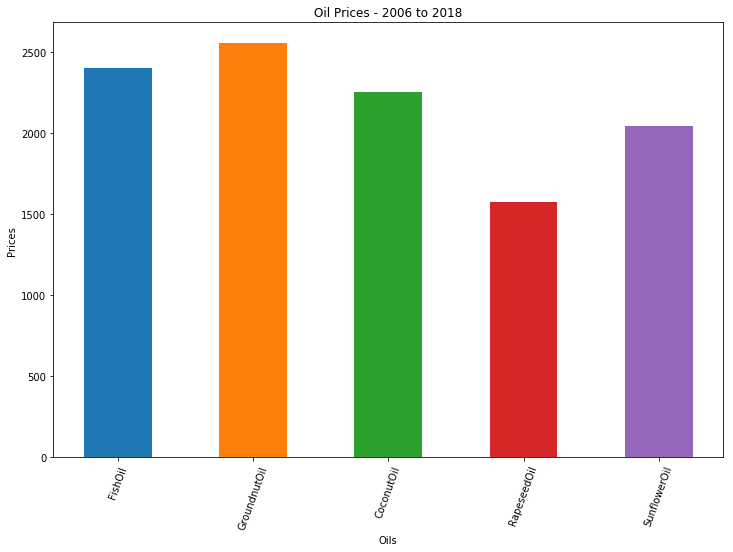

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.xticks(rotation=70)

plt.bar('FishOil', 
        oil_data['FishOil '], 
        width=0.5)

plt.bar('GroundnutOil', 
        oil_data['GroundnutOil '], 
        width=0.5)

plt.bar('CoconutOil', 
        oil_data['CoconutOil '], 
        width=0.5)

plt.bar('RapeseedOil', 
        oil_data['RapeseedOil '], 
        width=0.5)

plt.bar('SunflowerOil', 
        oil_data['SunflowerOil '], 
        width=0.5)

plt.title('Oil Prices - 2006 to 2018')

plt.xlabel('Oils')
plt.ylabel('Prices')

In [7]:
max_val = oil_data['GroundnutOil '].max()

max_val

2555.0

In [8]:
oil_data[:][oil_data['GroundnutOil '] == max_val]

,Year,Month,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
76,2012,May,1085.0,1218.0,2555.0,1275.0,1235.0,1155.0,1758.0,1223.0,1045.0


In [9]:
min_val = oil_data['GroundnutOil '].min()

min_val

0.0

In [11]:
mean_val = oil_data['GroundnutOil '].mean()

mean_val

1414.6013071895425

In [12]:
median_val = oil_data['GroundnutOil '].median()

median_val

1356.0

Text(0,0.5,'Prices')

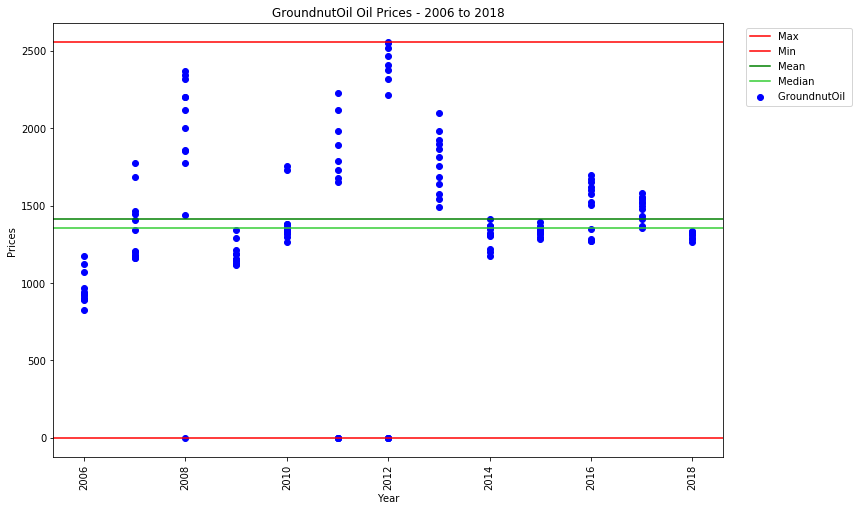

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90)

plt.scatter(oil_data['Year'], 
            oil_data['GroundnutOil '], 
            color='blue')

plt.axhline(max_val, label='Max', color='red')
plt.axhline(min_val, label='Min', color='red')

plt.axhline(mean_val, label='Mean', color='green')
plt.axhline(median_val, label='Median', color='limegreen')


plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('GroundnutOil Oil Prices - 2006 to 2018')
plt.xlabel('Year')
plt.ylabel('Prices')